**Ciencia y analítica de datos**

**Carlos Álvarez**

Analisis de Datos con Python

---

Pandas para el análisis de datos en Python

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Ciencia y Analitica de Datos_TC4029.11/Modulo 2/Actividad 2.2')

---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [ ]:
import pandas as pd

air_df = pd.read_csv('LaqnData.csv')

1.1 Analizando la Estructura del dataframe:

In [ ]:
air_df.shape

(43800, 6)

In [ ]:
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [ ]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [ ]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [ ]:
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [ ]:
air_df.isna()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
43795,False,False,False,False,False,False
43796,False,False,False,False,False,False
43797,False,False,False,False,False,False
43798,False,False,False,False,False,False


1.2 Calculando el porcentaje de valores faltantes por columna

In [ ]:
#Se contabiliza el total de datos mediante la propiedad shape
#Se contabilizan los valores nulos de cada columna por medio de sum()  despues de aplicar isna()
#Se aplica una funcion lambda que obtiene los porcentajes para cada columna
total_valores = air_df.shape[0]
air_df.isna().sum().apply( lambda r: (r/total_valores)*100)



Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

Solo la columna "Value" tiene valores vacios con un 7.37% del total de los datos

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

2.0 En la siguiente tabla se muestran los valores unicos por columna

In [ ]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

2.1 ¿Cuántas mediciones se hicieron?

In [ ]:
#Considerando que de cada medición se obtienen valores para los cinco contaminantes (una sola estacion de medición) se realizaron 8760 mediciones
air_df.ReadingDateTime.nunique()

8760

2.2 ¿Cuántos contaminantes del aire (Species) se analizaron?

In [ ]:
#Se analizaron 5 contaminantes
air_df.Species.nunique()

5

2.3 ¿Qué columnas no agregan ningún valor informativo porque tienen el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

In [ ]:
#"Site" y "Provisional or Ratified" no agregan valor por tener solo un unico dato que se repite en todo el dataframe.
air_df = air_df[['Species','ReadingDateTime','Value','Units']]
air_df

,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3
...,...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0,ug m-3
43796,PM2.5,31/12/2017 20:00,6.0,ug m-3
43797,PM2.5,31/12/2017 21:00,5.0,ug m-3
43798,PM2.5,31/12/2017 22:00,5.0,ug m-3


2.4 La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe.

In [ ]:
#No agrega valor debido a que los valores de esta columna son equivalentes entre si.
air_df.Units.unique()

array(['ug m-3', 'ug m-3 as NO2', 'ug/m3'], dtype=object)

In [ ]:
air_df = air_df[['Species','ReadingDateTime','Value']]
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [ ]:
#El numero de registros de cada contaminante coincide con la cantidad de mediciones
air_df.Species.value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [ ]:
air_df.groupby('Species').Value.mean()



Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [ ]:
air_wide_df = pd.read_csv('LaqnData.csv')
pvt_df = air_wide_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?   
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [ ]:
#El mayor valor de NO2 registrado es 120.2 y pertenece al 24/01/2017
#El menor valor de PM10 registrado es -5.6 y pertenece al 12/09/2017
#La Mediana del NO es 7.1, es la mediana mas baja del grupo y con segunda menor desviación estandar, lo que quiere decir que el rango de valores de "NO" esta en las concentraciones mas bajas.
#El primer cuartil de "PM2.5" esta en 7.0, lo que indica que el 25% de los valores de PM2.5 es menor a 7

#***SOLO COMO OBSERVACIÓN, HAY VALORES NEGATIVOS EN LOS DATOS, LO CUAL ME PARECE NO ES CORRECTO PARA VALORES DE CONCENTRACIÓN, ESTO PODRIA IMPLICAR UN ERROR DE MEDICIÓN DE LABORATORIO.***
#***ME VI TENTADO A EDITAR LA COLUMNA DE VALORES PARA QUE TODOS SEAN POSITIVOS, SIN EMBARGO ME PARECE QUE ESTO NO ESTA CONSIDERADO EN EL EJERCICIO Y PARA QUE LAS RESPUESTAS***************
#***NO SEAN DIFERENTES OPTÉ POR DEJAR EL DATAFRAME COMO ESTABA ORIGINALMENTE Y CONTINUAR CON LAS INSTRUCCIONES DE CADA EJERCICIO.**********************************************************

pvt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
NO,8660.0,15.045115,26.678565,-2.0,3.1,7.1,15.5,401.79999
NO2,8660.0,38.010185,18.580841,2.8,23.8,35.3,49.9,120.20000
NOX,8660.0,61.078661,54.584805,1.0,30.3,46.9,73.8,734.29999
PM10,8657.0,22.551704,15.344755,-5.6,13.9,19.5,27.3,633.09998
PM2.5,5933.0,14.999831,13.558588,-8.0,7.0,11.0,18.0,128.00000


Calculando el dia al que pertenece el mayor valor de NO2

In [ ]:
#El mayor valor de NO2 registrado es 120.2 y pertenece al 24/01/2017
filtro_mayor_NO = (air_df.Value == 120.20000) & (air_df.Species == 'NO2')
resultado_NO = air_df.ReadingDateTime[filtro_mayor_NO]
print(resultado_NO)



9331    24/01/2017 19:00
Name: ReadingDateTime, dtype: object


Calculando el dia al que pertenece el minimo valor de PM10

In [ ]:
#El menor valor de PM10 registrado es -5.6 y pertenece al 12/09/2017
filtro_menor_PM10 = (air_df.Value == -5.6) & (air_df.Species == 'PM10')
resultado_PM10 = air_df.ReadingDateTime[filtro_menor_PM10]
print(resultado_PM10)


32399    12/09/2017 23:00
Name: ReadingDateTime, dtype: object


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

El contaminante con mayor variabilidad es el NOX, ya que tiene la mayor desviación estándar que se puede apreciar en la gráfica con la mayor dispersión de datos.

26.67856529207776

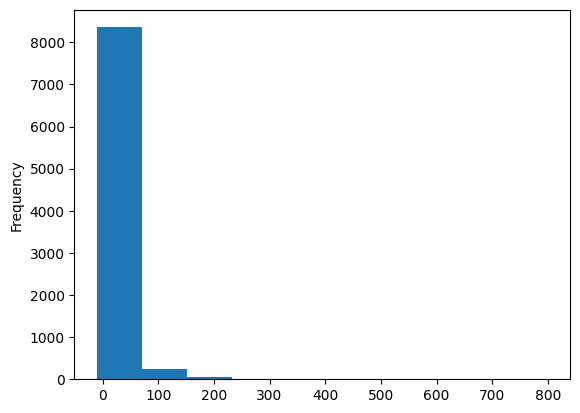

In [87]:
#Se considera numero de bins como 10, por regla de scott y sturges arroja algo similar.
pvt_df.NO.plot.hist(bins= 10, range=(-10,800))
pvt_df.NO.std()


18.580841313012183

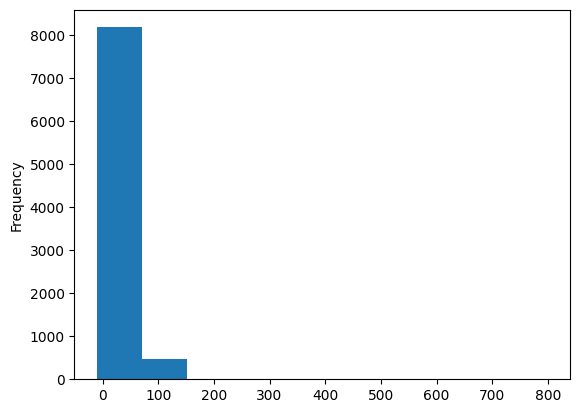

In [88]:
#Se considera numero de bins como 10, por regla de scott y sturges arroja algo similar.
pvt_df.NO2.plot.hist(bins= 10,range=(-10,800))
pvt_df.NO2.std()


54.584805082983586

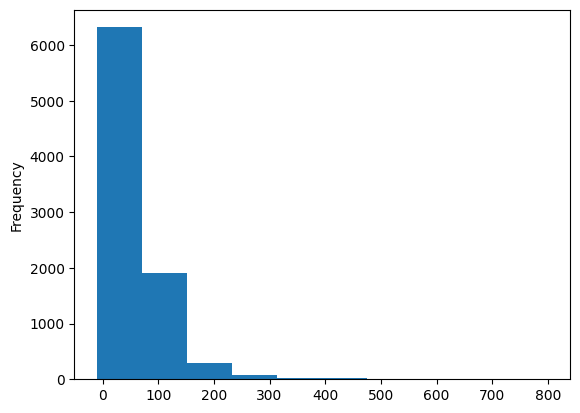

In [89]:
#Se considera numero de bins como 10, por regla de scott y sturges arroja algo similar.
pvt_df.NOX.plot.hist(bins=10,range=(-10,800))
pvt_df.NOX.std()


15.344754992403102

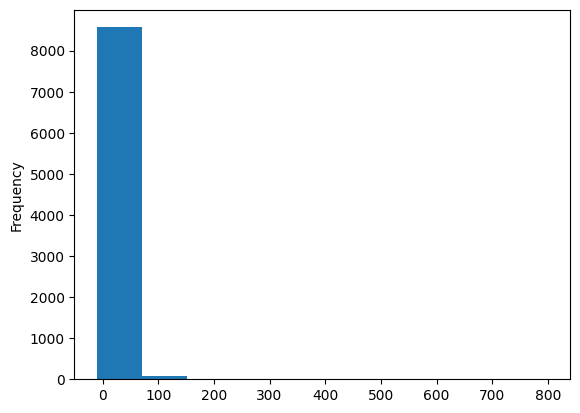

In [90]:
#Se considera numero de bins como 10, por regla de scott y sturges arroja algo similar.
pvt_df.PM10.plot.hist(bins= 10,range=(-10,800))
pvt_df.PM10.std()

13.558587686002454

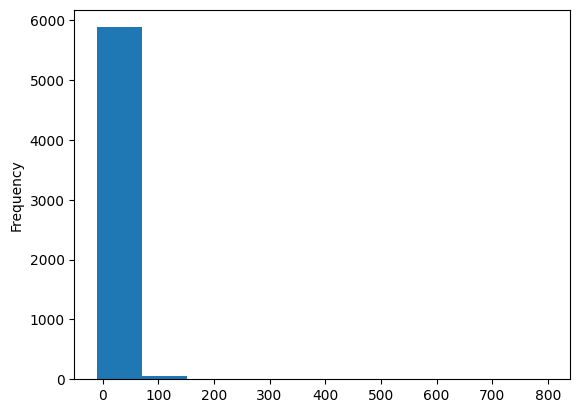

In [91]:
#Se considera numero de bins como 10, por regla de scott y sturges arroja algo similar.
pvt_df['PM2.5'].plot.hist(bins= 10,range=(-10,800))
pvt_df['PM2.5'].std()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [ ]:
#Genera un nuevo dataframe con dos columnas, separando la fecha y el tiempo en el dataframe original.
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#Actualiza los valores de las columnas nombrándolas como 'Date' y 'Time' respectivamente.
datetime_df.columns = ['Date','Time']
#Se imprime el dataframe para observar los cambios.
datetime_df
#Genera otro dataframe con los datos de la fecha en diferentes columnas, una para año otra para mes y una para el dia.
date_df = datetime_df.Date.str.split('/',expand=True)
#Nombra las columnas del nuevo dataframe como 'Day','Month','Year'.
date_df.columns = ['Day','Month','Year']
#Se imprime el dataframe para observar los cambios.
date_df
#Se fusiona el dataframe air_df con el dataframe 'date_df' y con la columna 'Time' del dataframe 'date_time_df' y finalmente se eliminan las columnas
#'ReadingDateTime'y'Year'del datafram original air_df.
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Se definen como indices las columnas: 'Month','Day','Time','Species'
air_df = air_df.set_index(['Month','Day','Time','Species'])
#Se imprime el dataframe air_df para observar los cambios
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [ ]:
#El metodo unstack convierte en columnas los valores de una columna, lo cuál es útil para expandir un dataframe que ha sido agrupado. La salida
#de esta instrucción difiere de la anterior en que los valores categóricos de la columna 'Species' forman parte ahora de las columnas
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

La similitud entre los pares melt()/pivot() y el par stack()/unstack() es que ambos se utilizan para reorganizar la estructura de los datos de manera que se acomoden a las necesidades del análisis.

Por otro lado la diferencia es que con el par stack()/unstack() lo que se está modificando es el nivel jerárquico de índices o columnas moviendo índices a niveles mas altos de columnas y viceversa y el nivel de apilamiento o expansión está en función de la cantidad de veces que se aplique el método al dataframe. Por otro lado con el par pivot()/melt() existen parámetros que se pueden indicar al momento de aplicar los métodos para obtener de manera precisa la nueva estructura que necesitamos sin jugar con los niveles jerárquicos de índice o de columna.

La contraparte para melt() sería stack() ya que este convierte  valores de columna a índices produciendo el mismo efecto que melt(), es decir, convirtiendo una tabla ancha a una tabla larga.